# LetsGrowMore: Data Science

# Task 3 : Exploratory Data Analysis - Terrorism

# Name of Intern: Sachin Kumar Verma

# Loading Packages and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
#setting the plot size using 'rcParams'
plt.rcParams['figure.figsize']=[15,8]

In [3]:
#set options
#display all columns of the dataframe
pd.options.display.max_columns=None

#display the rows of the dataframe
pd.options.display.max_rows=None #none for no limit

#use the below code to convert the exponential_values to float
np.set_printoptions(suppress=True)

In [4]:
#Reading data
data_terr = pd.read_csv('Globalterrorism.csv', encoding='ISO-8859-1')

In [5]:
data_terr.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MANO-D,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23rd of September Communist League,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,16.0,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN

In [6]:
data_terr.shape

(181691, 135)

In [7]:
data_terr.dtypes

eventid                 int64
iyear                   int64
imonth                  int64
iday                    int64
approxdate             object
extended                int64
resolution             object
country                 int64
country_txt            object
region                  int64
region_txt             object
provstate              object
city                   object
latitude              float64
longitude             float64
specificity           float64
vicinity                int64
location               object
summary                object
crit1                   int64
crit2                   int64
crit3                   int64
doubtterr             float64
alternative           float64
alternative_txt        object
multiple              float64
success                 int64
suicide                 int64
attacktype1             int64
attacktype1_txt        object
attacktype2           float64
attacktype2_txt        object
attacktype3           float64
attacktype

In [8]:
data_terr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [9]:
data_terr.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [10]:
#first I will rename the columns to avoid some unnecessary confusion to understand
data_terr.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','provstate':'state',
                       'region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed',
                       'nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type',
                       'weaptype1_txt':'Weapon_type','motive':'Motive'}, inplace=True)

In [11]:
data_terr.isnull().sum()

eventid                    0
Year                       0
Month                      0
Day                        0
approxdate            172452
extended                   0
resolution            179471
country                    0
Country                    0
region                     0
Region                     0
state                    421
city                     434
latitude                4556
longitude               4557
specificity                6
vicinity                   0
location              126196
Summary                66129
crit1                      0
crit2                      0
crit3                      0
doubtterr                  1
alternative           152680
alternative_txt       152680
multiple                   1
success                    0
suicide                    0
attacktype1                0
AttackType                 0
attacktype2           175377
attacktype2_txt       175377
attacktype3           181263
attacktype3_txt       181263
targtype1     

In [12]:
#sort the variabels basis of of total null values in the variable
#'isnull().sum()' returns the number of missing values in each variable
#'ascending=False'  sorts values in the descending order
#the variable with highest number of missing values will appear first
Total=data_terr.isnull().sum().sort_values(ascending=False)

#calculate the percentage of missing values
Percent=(data_terr.isnull().sum()*100/data_terr.isnull().count()).sort_values(ascending=False)

#concat the 'Total' and 'Percent' columns using 'concat' function
#'keys' is the list of column names
#'axis=1' concats along the columns
missing_data=pd.concat([Total,Percent],axis=1,keys=['Total','Percentage of missing values'])
missing_data

,Total,Percentage of missing values
gsubname3,181671,99.988992
weapsubtype4_txt,181621,99.961473
weapsubtype4,181621,99.961473
weaptype4,181618,99.959822
weaptype4_txt,181618,99.959822
claimmode3,181558,99.926799
claimmode3_txt,181558,99.926799
gsubname2,181531,99.911938
claim3,181373,99.824978
guncertain3,181371,99.823877


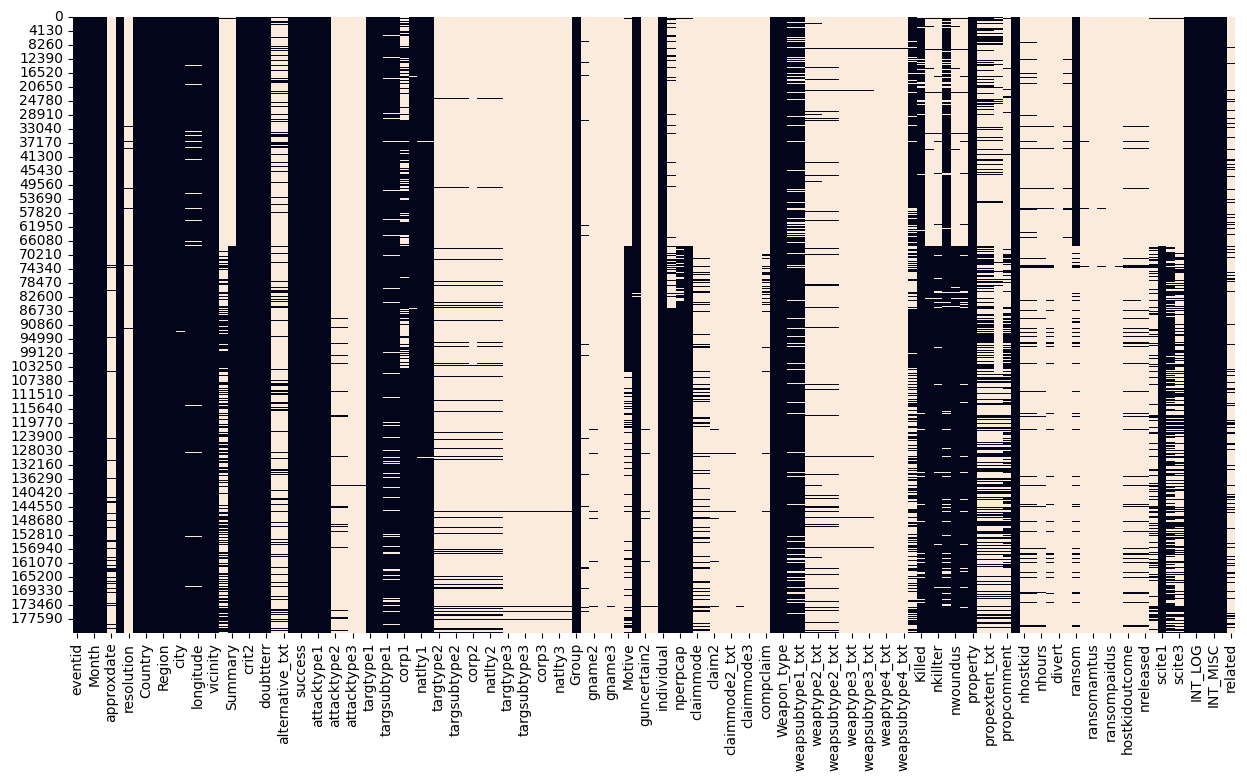

In [13]:
#plot heatmap to check null values
#'cbar=False' does not show the color axis
sns.heatmap(data_terr.isnull(), cbar=False)

#display the plot
plt.show()

In [14]:
print("Country with the most attacks:",data_terr['Country'].value_counts().idxmax())
print("City with the most attacks:",data_terr['city'].value_counts().index[1]) #as first entry is 'unknown'
print("Region with the most attacks:",data_terr['Region'].value_counts().idxmax())
print("Year with the most attacks:",data_terr['Year'].value_counts().idxmax())
print("Month with the most attacks:",data_terr['Month'].value_counts().idxmax())
print("Group with the most attacks:",data_terr['Group'].value_counts().index[1])
print("Most Attack Types:",data_terr['AttackType'].value_counts().idxmax())

Country with the most attacks: Iraq
City with the most attacks: Baghdad
Region with the most attacks: Middle East & North Africa
Year with the most attacks: 2014
Month with the most attacks: 5
Group with the most attacks: Taliban
Most Attack Types: Bombing/Explosion


In [15]:
data_terr['Year'].value_counts(dropna = False).sort_index()

1970      651
1971      471
1972      568
1973      473
1974      581
1975      740
1976      923
1977     1319
1978     1526
1979     2662
1980     2662
1981     2586
1982     2544
1983     2870
1984     3495
1985     2915
1986     2860
1987     3183
1988     3721
1989     4324
1990     3887
1991     4683
1992     5071
1994     3456
1995     3081
1996     3058
1997     3197
1998      934
1999     1395
2000     1814
2001     1906
2002     1333
2003     1278
2004     1166
2005     2017
2006     2758
2007     3242
2008     4805
2009     4721
2010     4826
2011     5076
2012     8522
2013    12036
2014    16903
2015    14965
2016    13587
2017    10900
Name: Year, dtype: int64

# Data Visualisation

## 1. Number of Terrorist Activities each Year

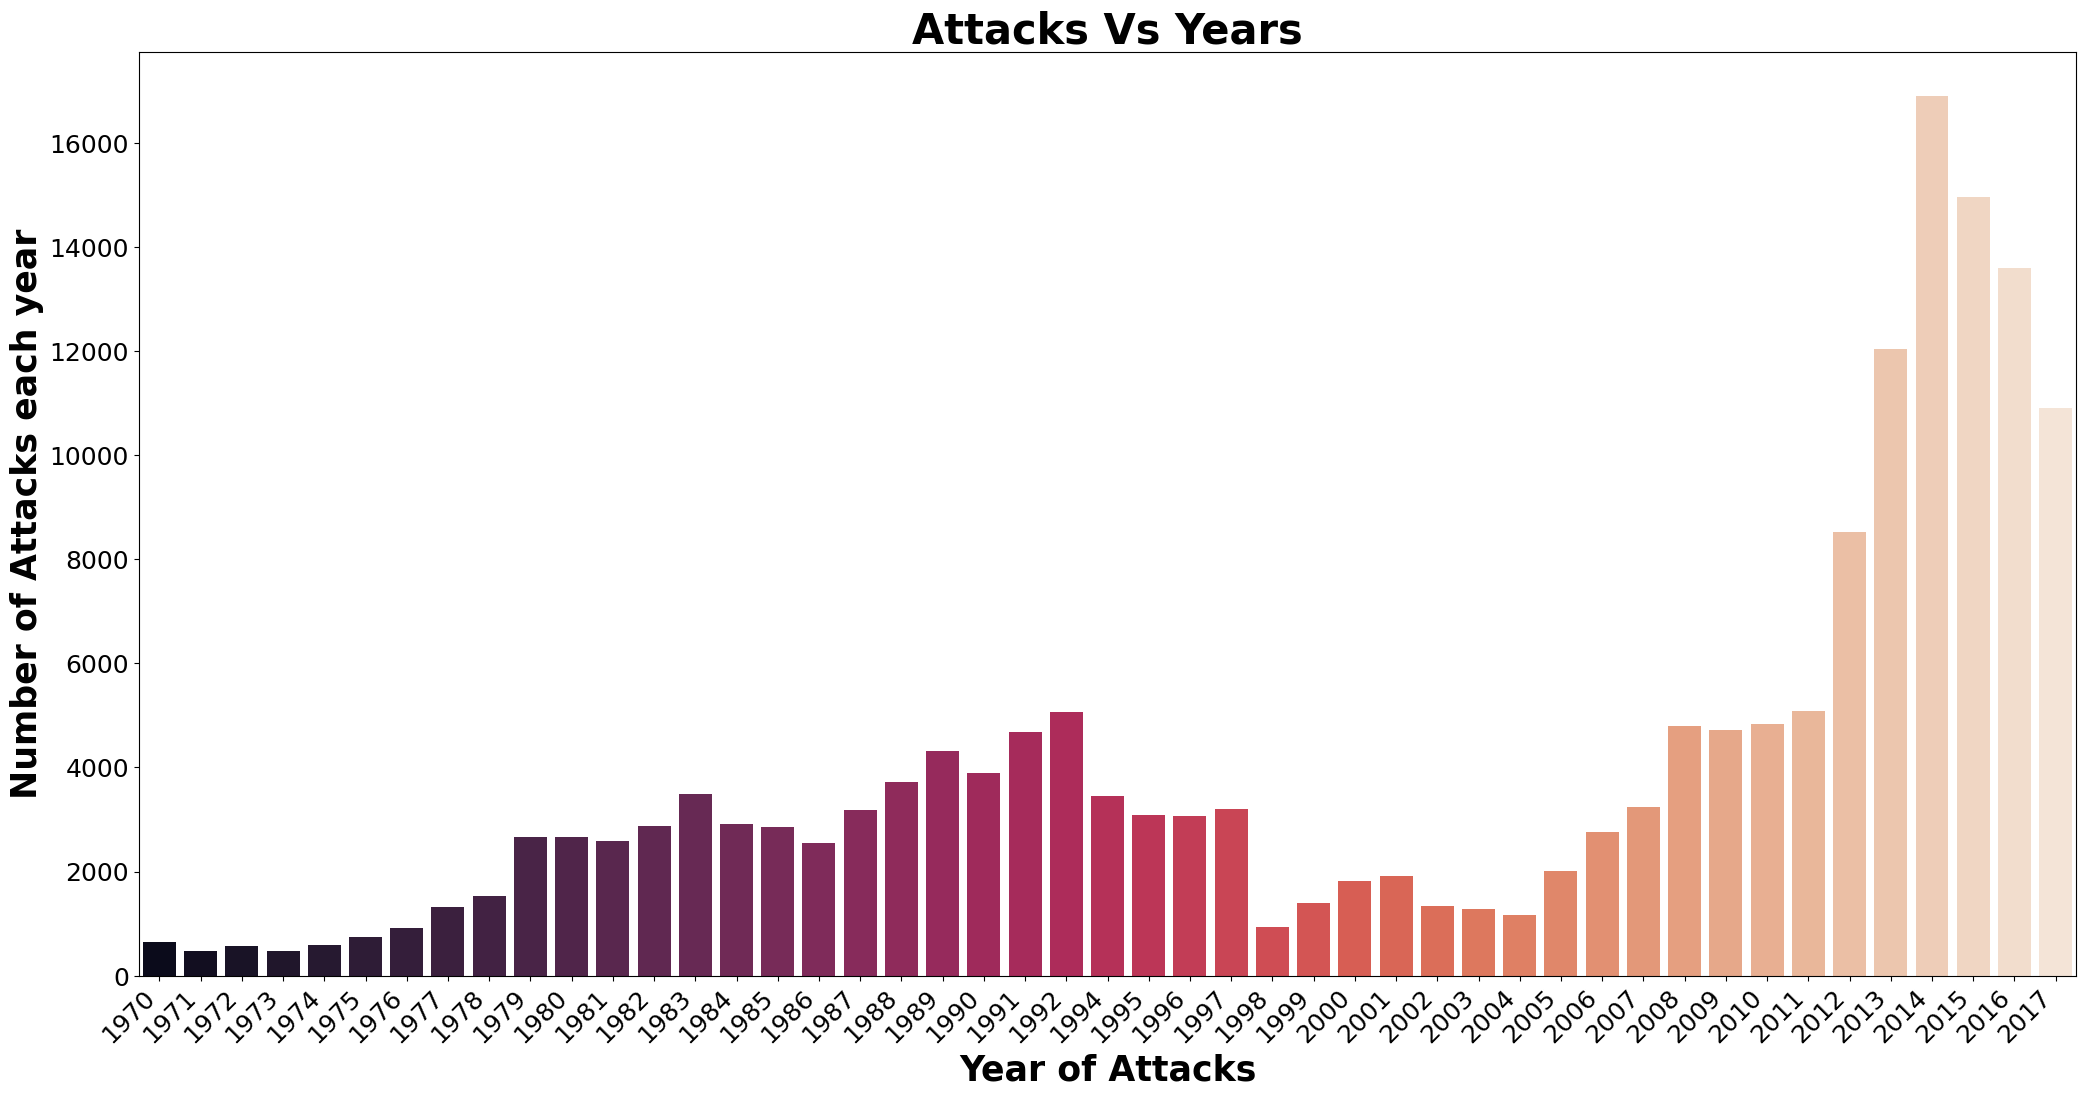

In [16]:
x_year=data_terr['Year'].unique()
y_count_years=data_terr['Year'].value_counts(dropna=False).sort_index()
plt.figure(figsize=(25,12))
sns.barplot(x = x_year,
           y = y_count_years,
           palette = 'rocket')
plt.xticks(fontsize=18, rotation=45, ha='right')
plt.yticks(fontsize=18)
plt.xlabel('Year of Attacks',fontsize=25,fontweight='bold')
plt.ylabel('Number of Attacks each year',fontsize=25,fontweight='bold')
plt.title('Attacks Vs Years',fontsize=30,fontweight='bold')
plt.show()

### The graph shows the number of Attacks in each year from 1970 to 1992 and here we observed that the number of global terrorism attacks are continuously increasing from 1988. The Graph shows 1992 was the most miserable year because the most number of attacks took place in the year 1992

## 2. Top 10 terrorist group attack

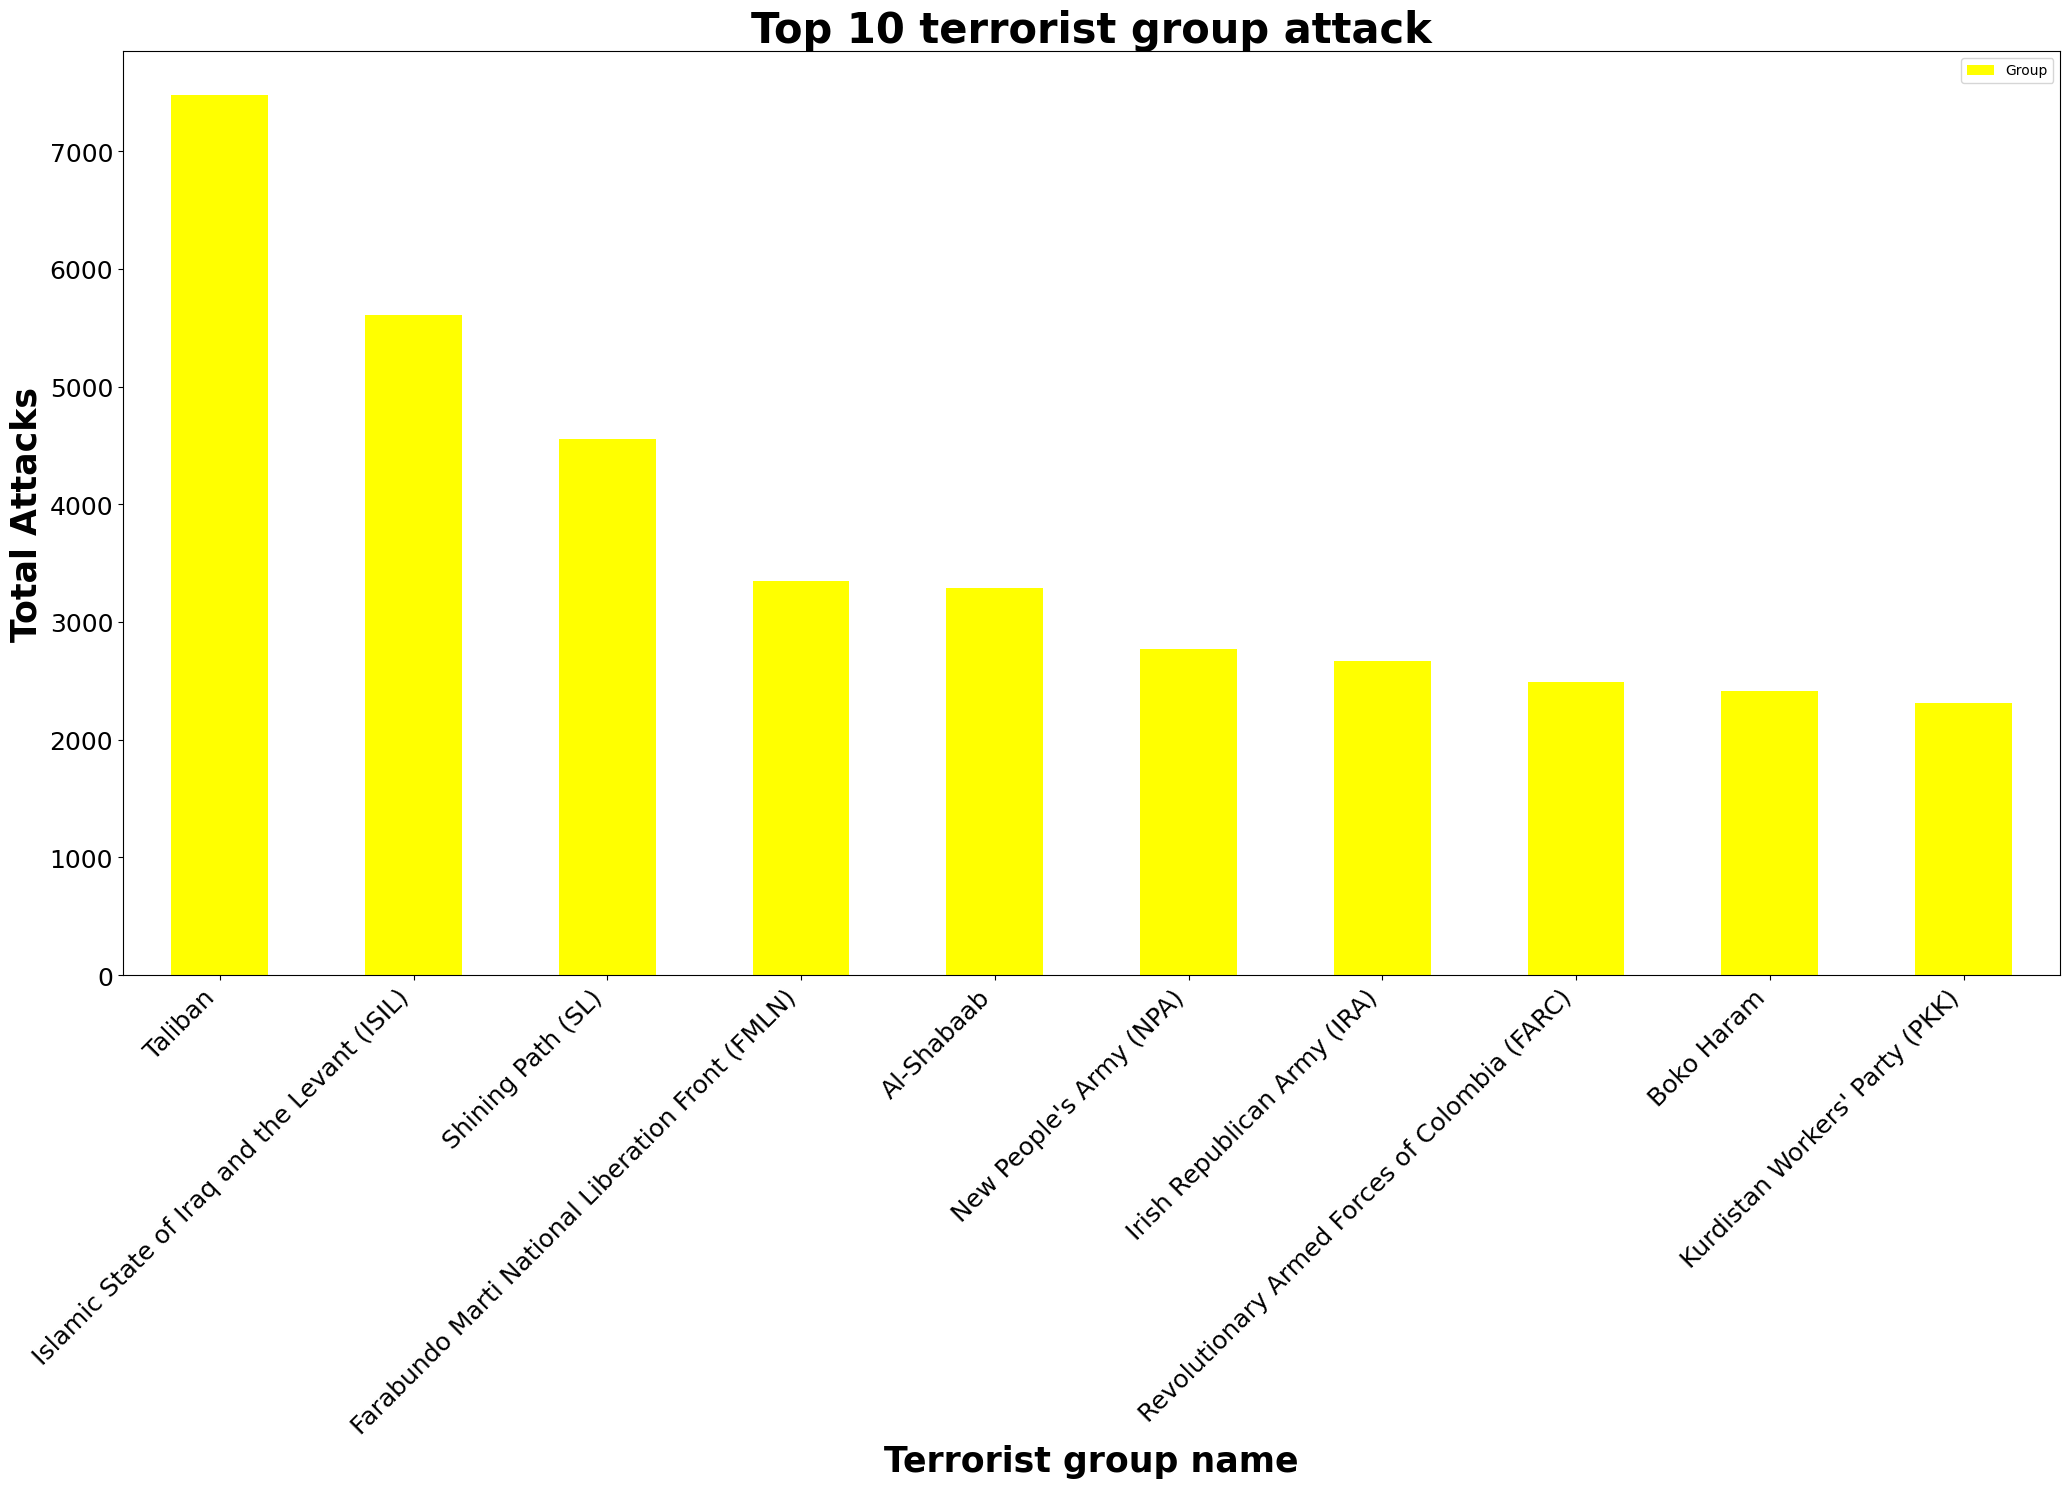

In [17]:
data_terr['Group'].value_counts().to_frame().drop("Unknown").head(10).plot(kind="bar",color="yellow", figsize=(25,12)) 
plt.xticks(fontsize=18, rotation=45, ha='right')
plt.yticks(fontsize=18)
plt.title("Top 10 terrorist group attack", fontsize=30,fontweight='bold')
plt.xlabel("Terrorist group name",fontsize=25, fontweight='bold') 
plt.ylabel("Total Attacks", fontsize=25,fontweight='bold')
plt.show()

### Here the graph shows the top 10 terrorist group attacks and Taliban is the most active terrorist group followed by the others

## 3. Terrorist Activities by Region in each Year through Area Plot

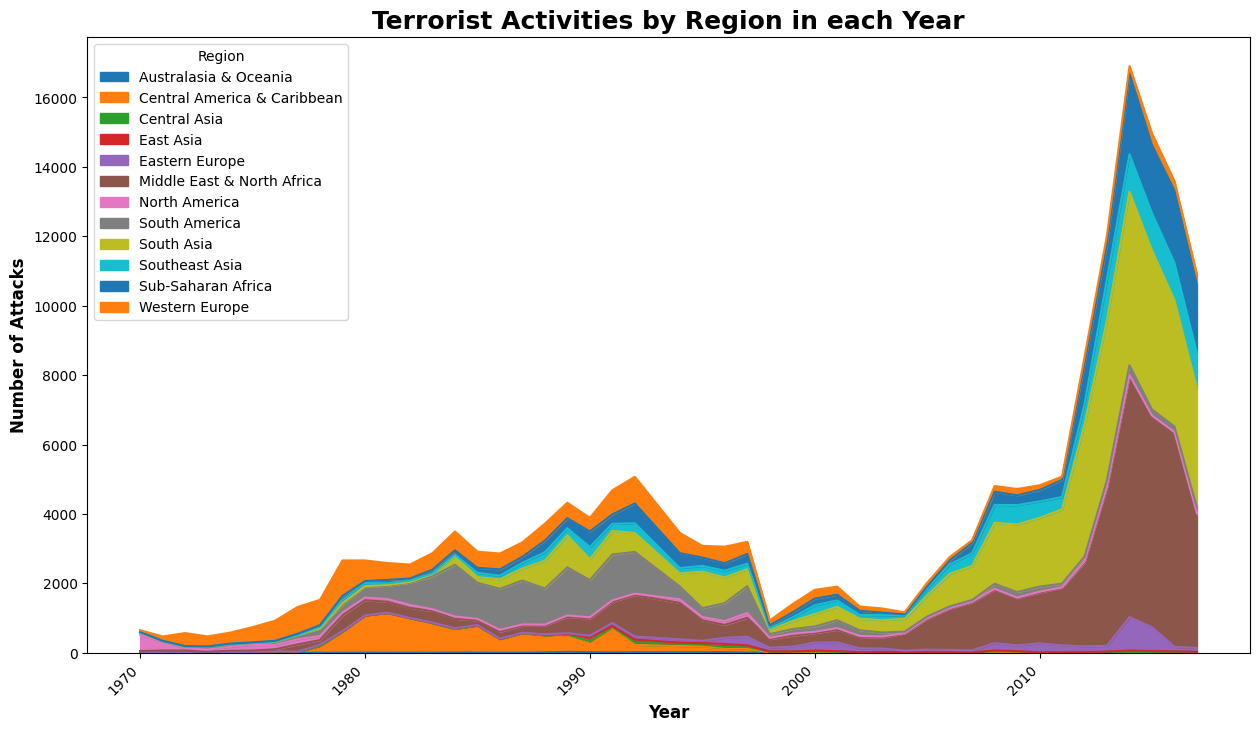

In [18]:
pd.crosstab(data_terr.Year, data_terr.Region).plot(kind='area',figsize=(15,8))
plt.title('Terrorist Activities by Region in each Year',fontsize=18,fontweight='bold')
plt.xlabel('Year',fontweight='bold',fontsize=12)
plt.ylabel('Number of Attacks',fontweight='bold',fontsize=12)
plt.xticks(fontsize=10, rotation=45, ha='right')
plt.yticks(fontsize=10)
plt.show()

### Top 10 most affected terriost attack region is Middle East and North Africa

## 4. Top 10 most affected terriost attack countries

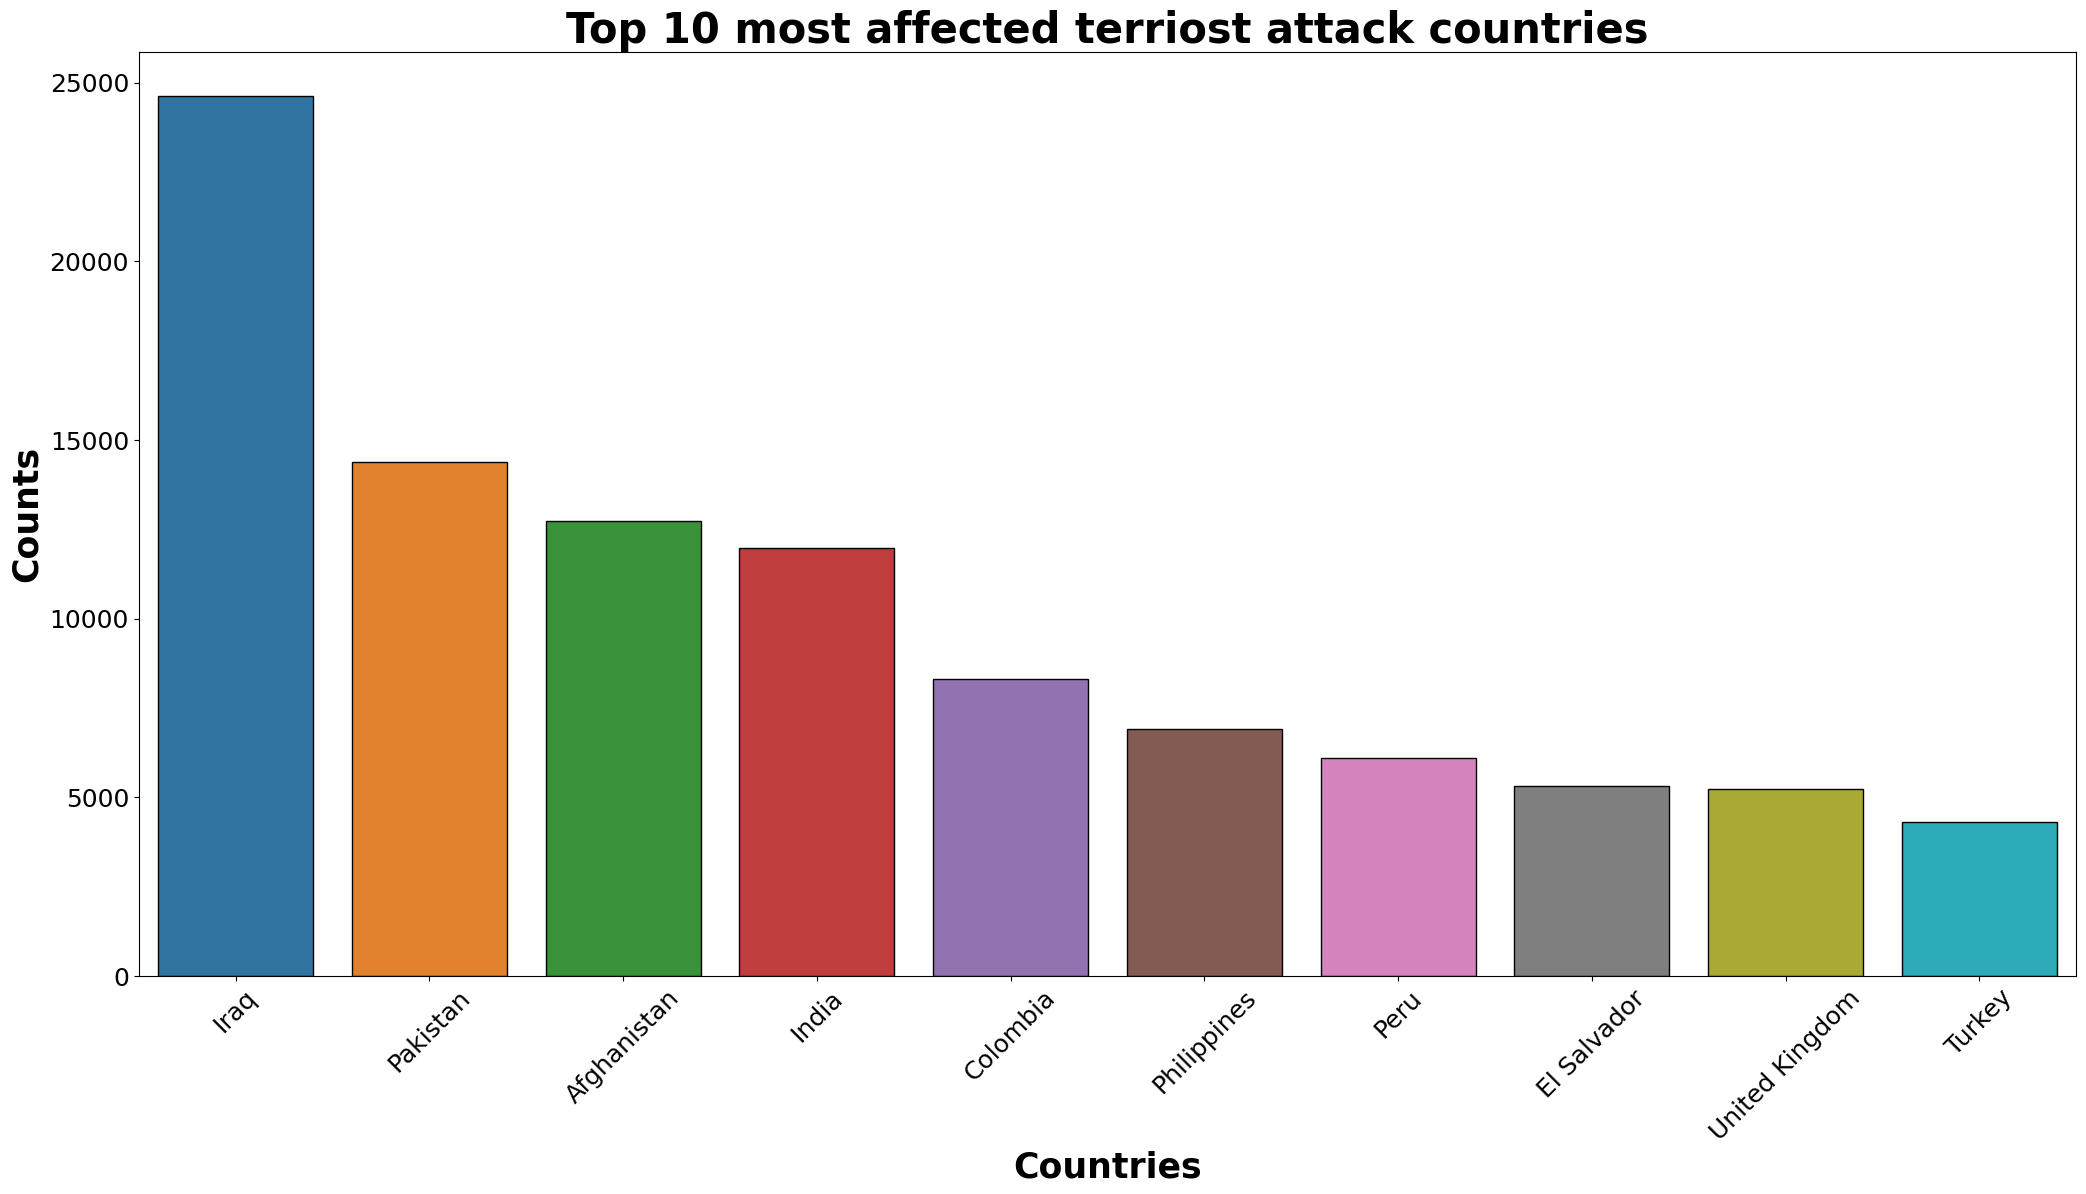

In [19]:
plt.figure(figsize=(25,12))
sns.barplot(x=data_terr["Country"].value_counts()[:10].index,y=data_terr["Country"].value_counts()[:10].values,edgecolor='k')
plt.xlabel('Countries',fontweight='bold',fontsize=25)
plt.ylabel('Counts',fontweight='bold',fontsize=25)
plt.title('Top 10 most affected terriost attack countries',fontweight='bold',fontsize=30)
plt.xticks(rotation=45,fontsize=18)
plt.yticks(fontsize=18)
plt.show()

In [20]:
data_terr.Country.value_counts()[:15]

Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Somalia            4142
Nigeria            3907
Thailand           3849
Yemen              3347
Spain              3249
Name: Country, dtype: int64

### Top 10 most affected terriost attack country is Iraq

## 5. Top 10 most affected terrorist attack States

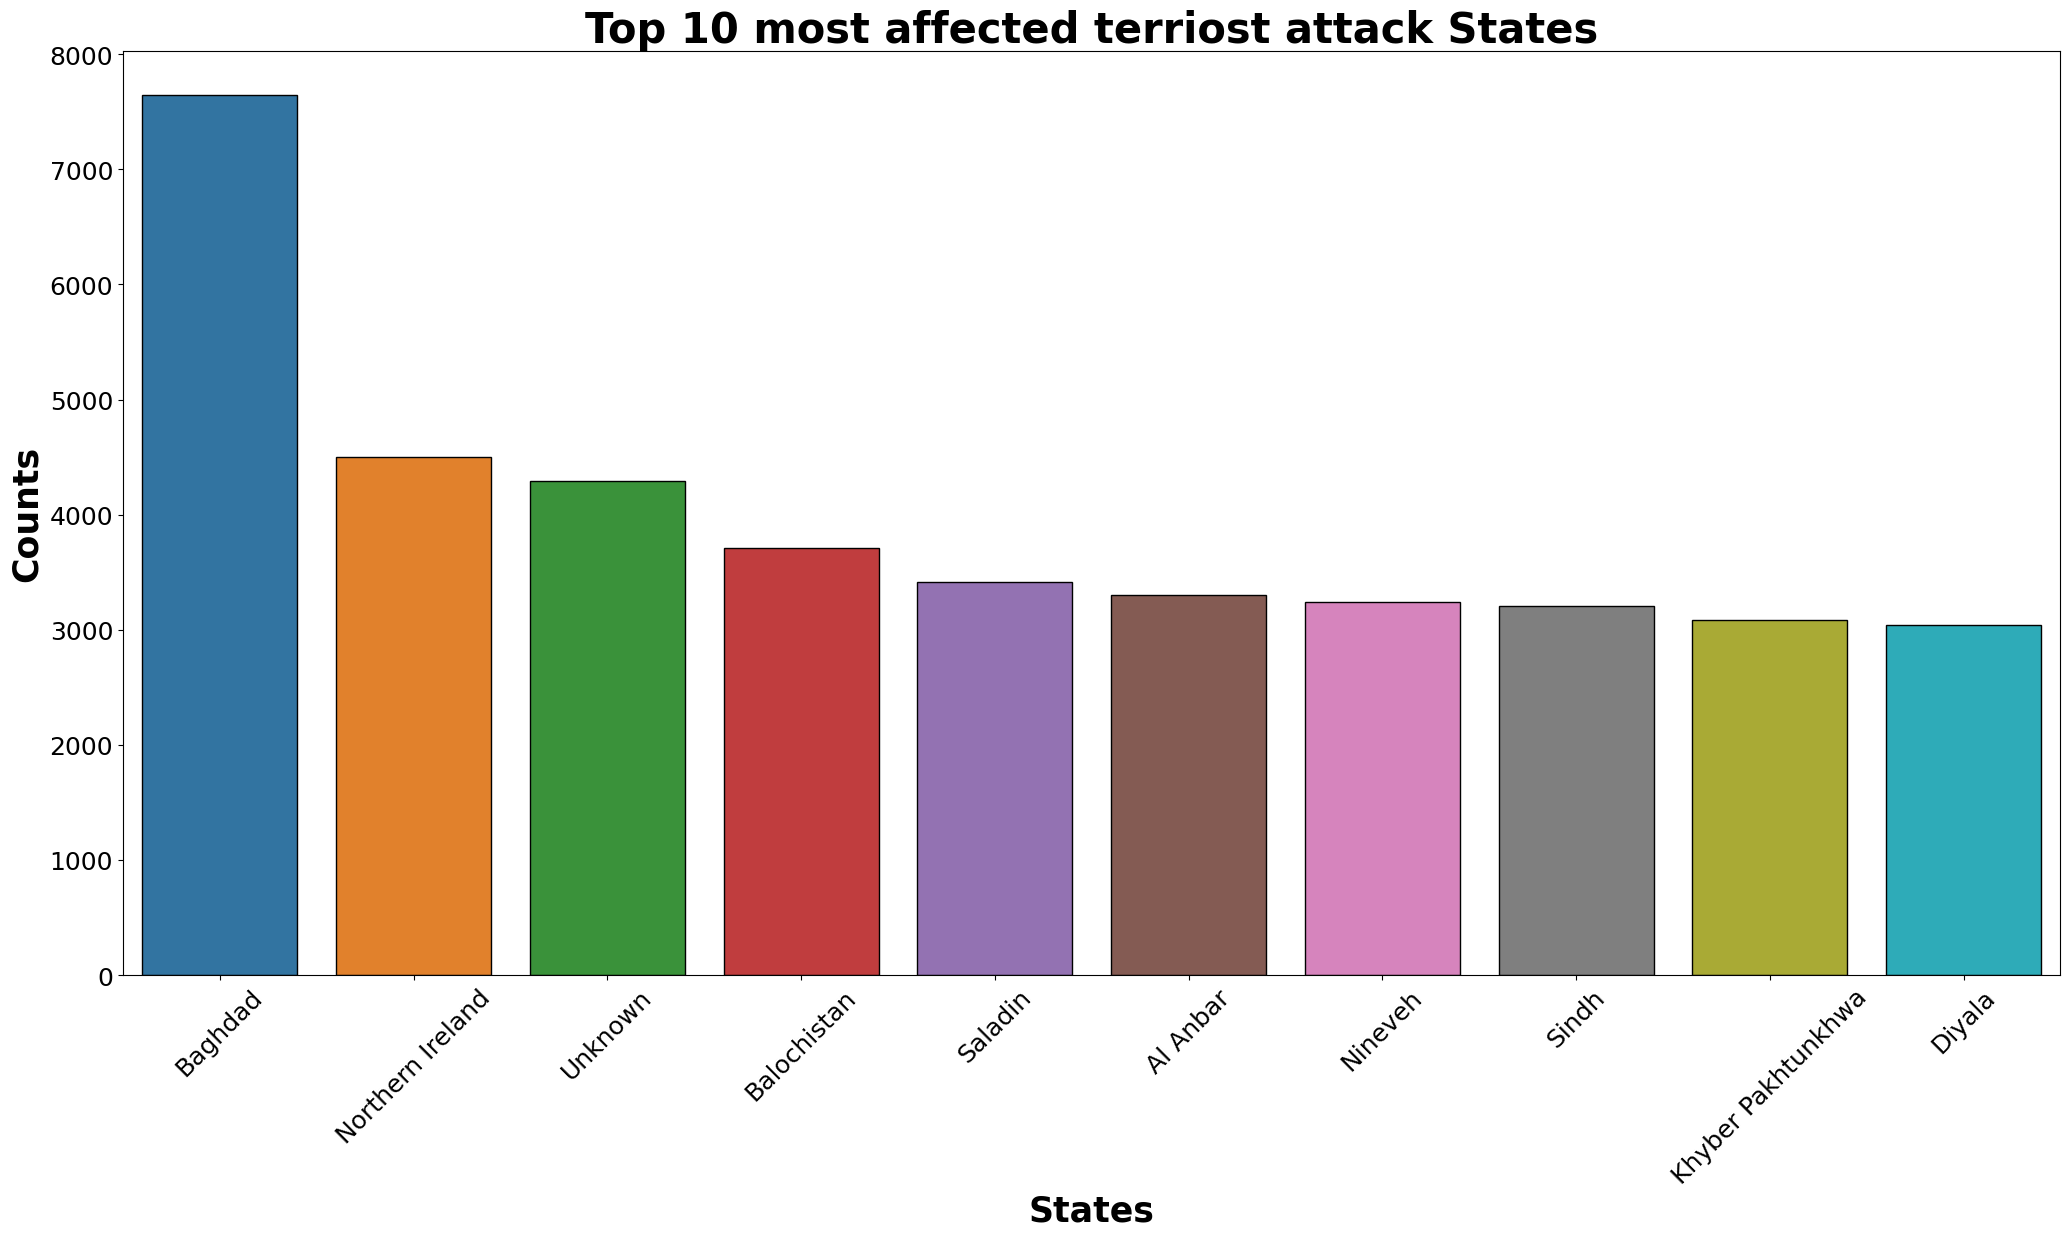

In [21]:
plt.figure(figsize=(25,12))
sns.barplot(x=data_terr["state"].value_counts()[:10].index,y=data_terr["state"].value_counts()[:10].values,edgecolor='k')
plt.xlabel('States',fontweight='bold',fontsize=25)
plt.ylabel('Counts',fontweight='bold',fontsize=25)
plt.title('Top 10 most affected terriost attack States',fontweight='bold',fontsize=30)
plt.xticks(rotation=45,fontsize=18)
plt.yticks(fontsize=18)
plt.show()

### The most affected terriost attack State is Baghdad

## 6. Top 10 most affected terrorist attack in Cities

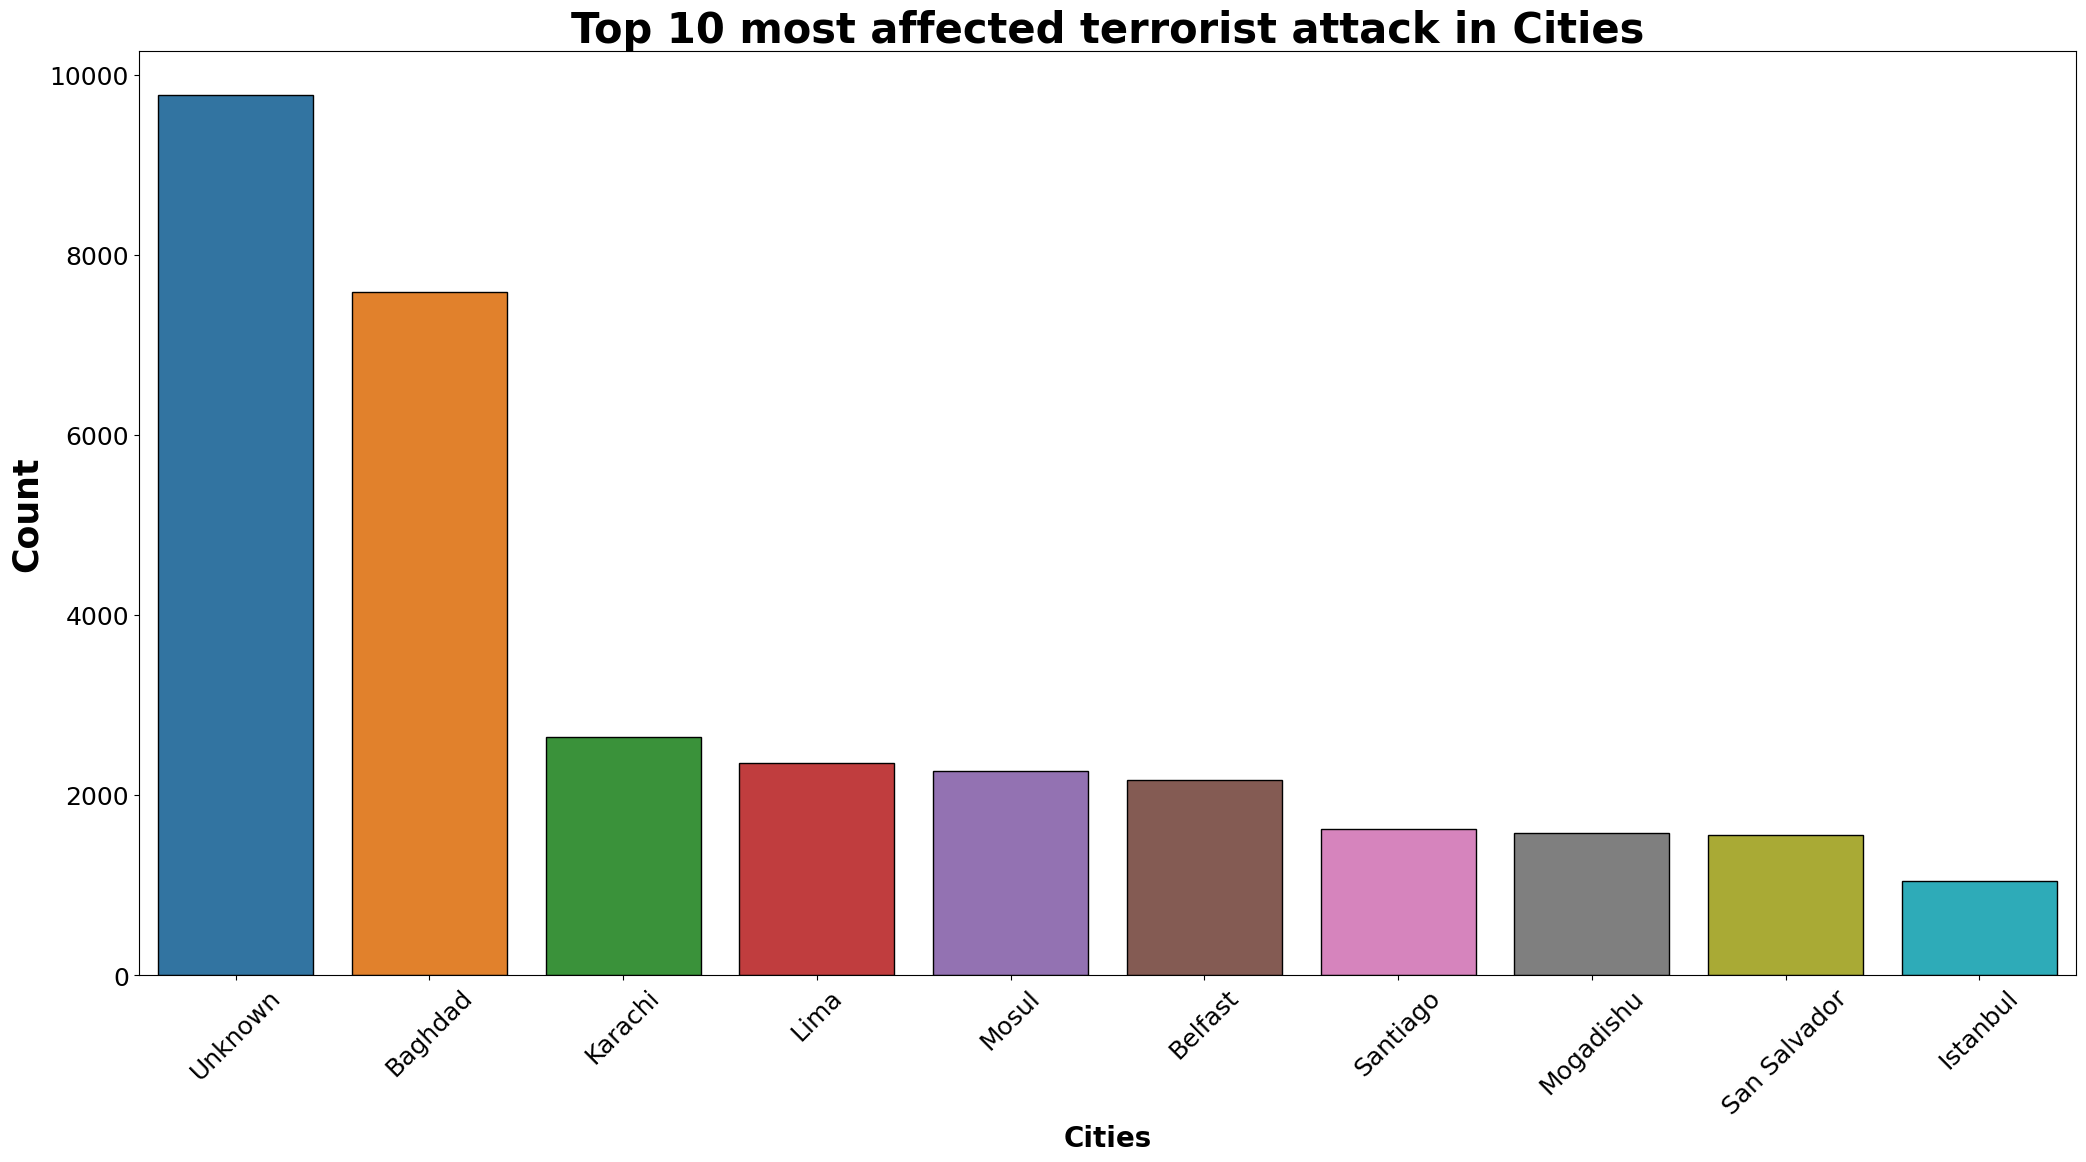

In [22]:
plt.figure(figsize=(25,12))
sns.barplot(x=data_terr["city"].value_counts()[:10].index,y=data_terr["city"].value_counts()[:10].values,edgecolor='k')
plt.xlabel('Cities',fontweight='bold',fontsize=20)
plt.ylabel('Count',fontweight='bold',fontsize=25)
plt.title('Top 10 most affected terrorist attack in Cities',fontweight='bold',fontsize=30)
plt.xticks(rotation=45,fontsize=18)
plt.yticks(fontsize=18)
plt.show()

### The most affected terriost attack State is Baghdad

## 7. Weapons Used

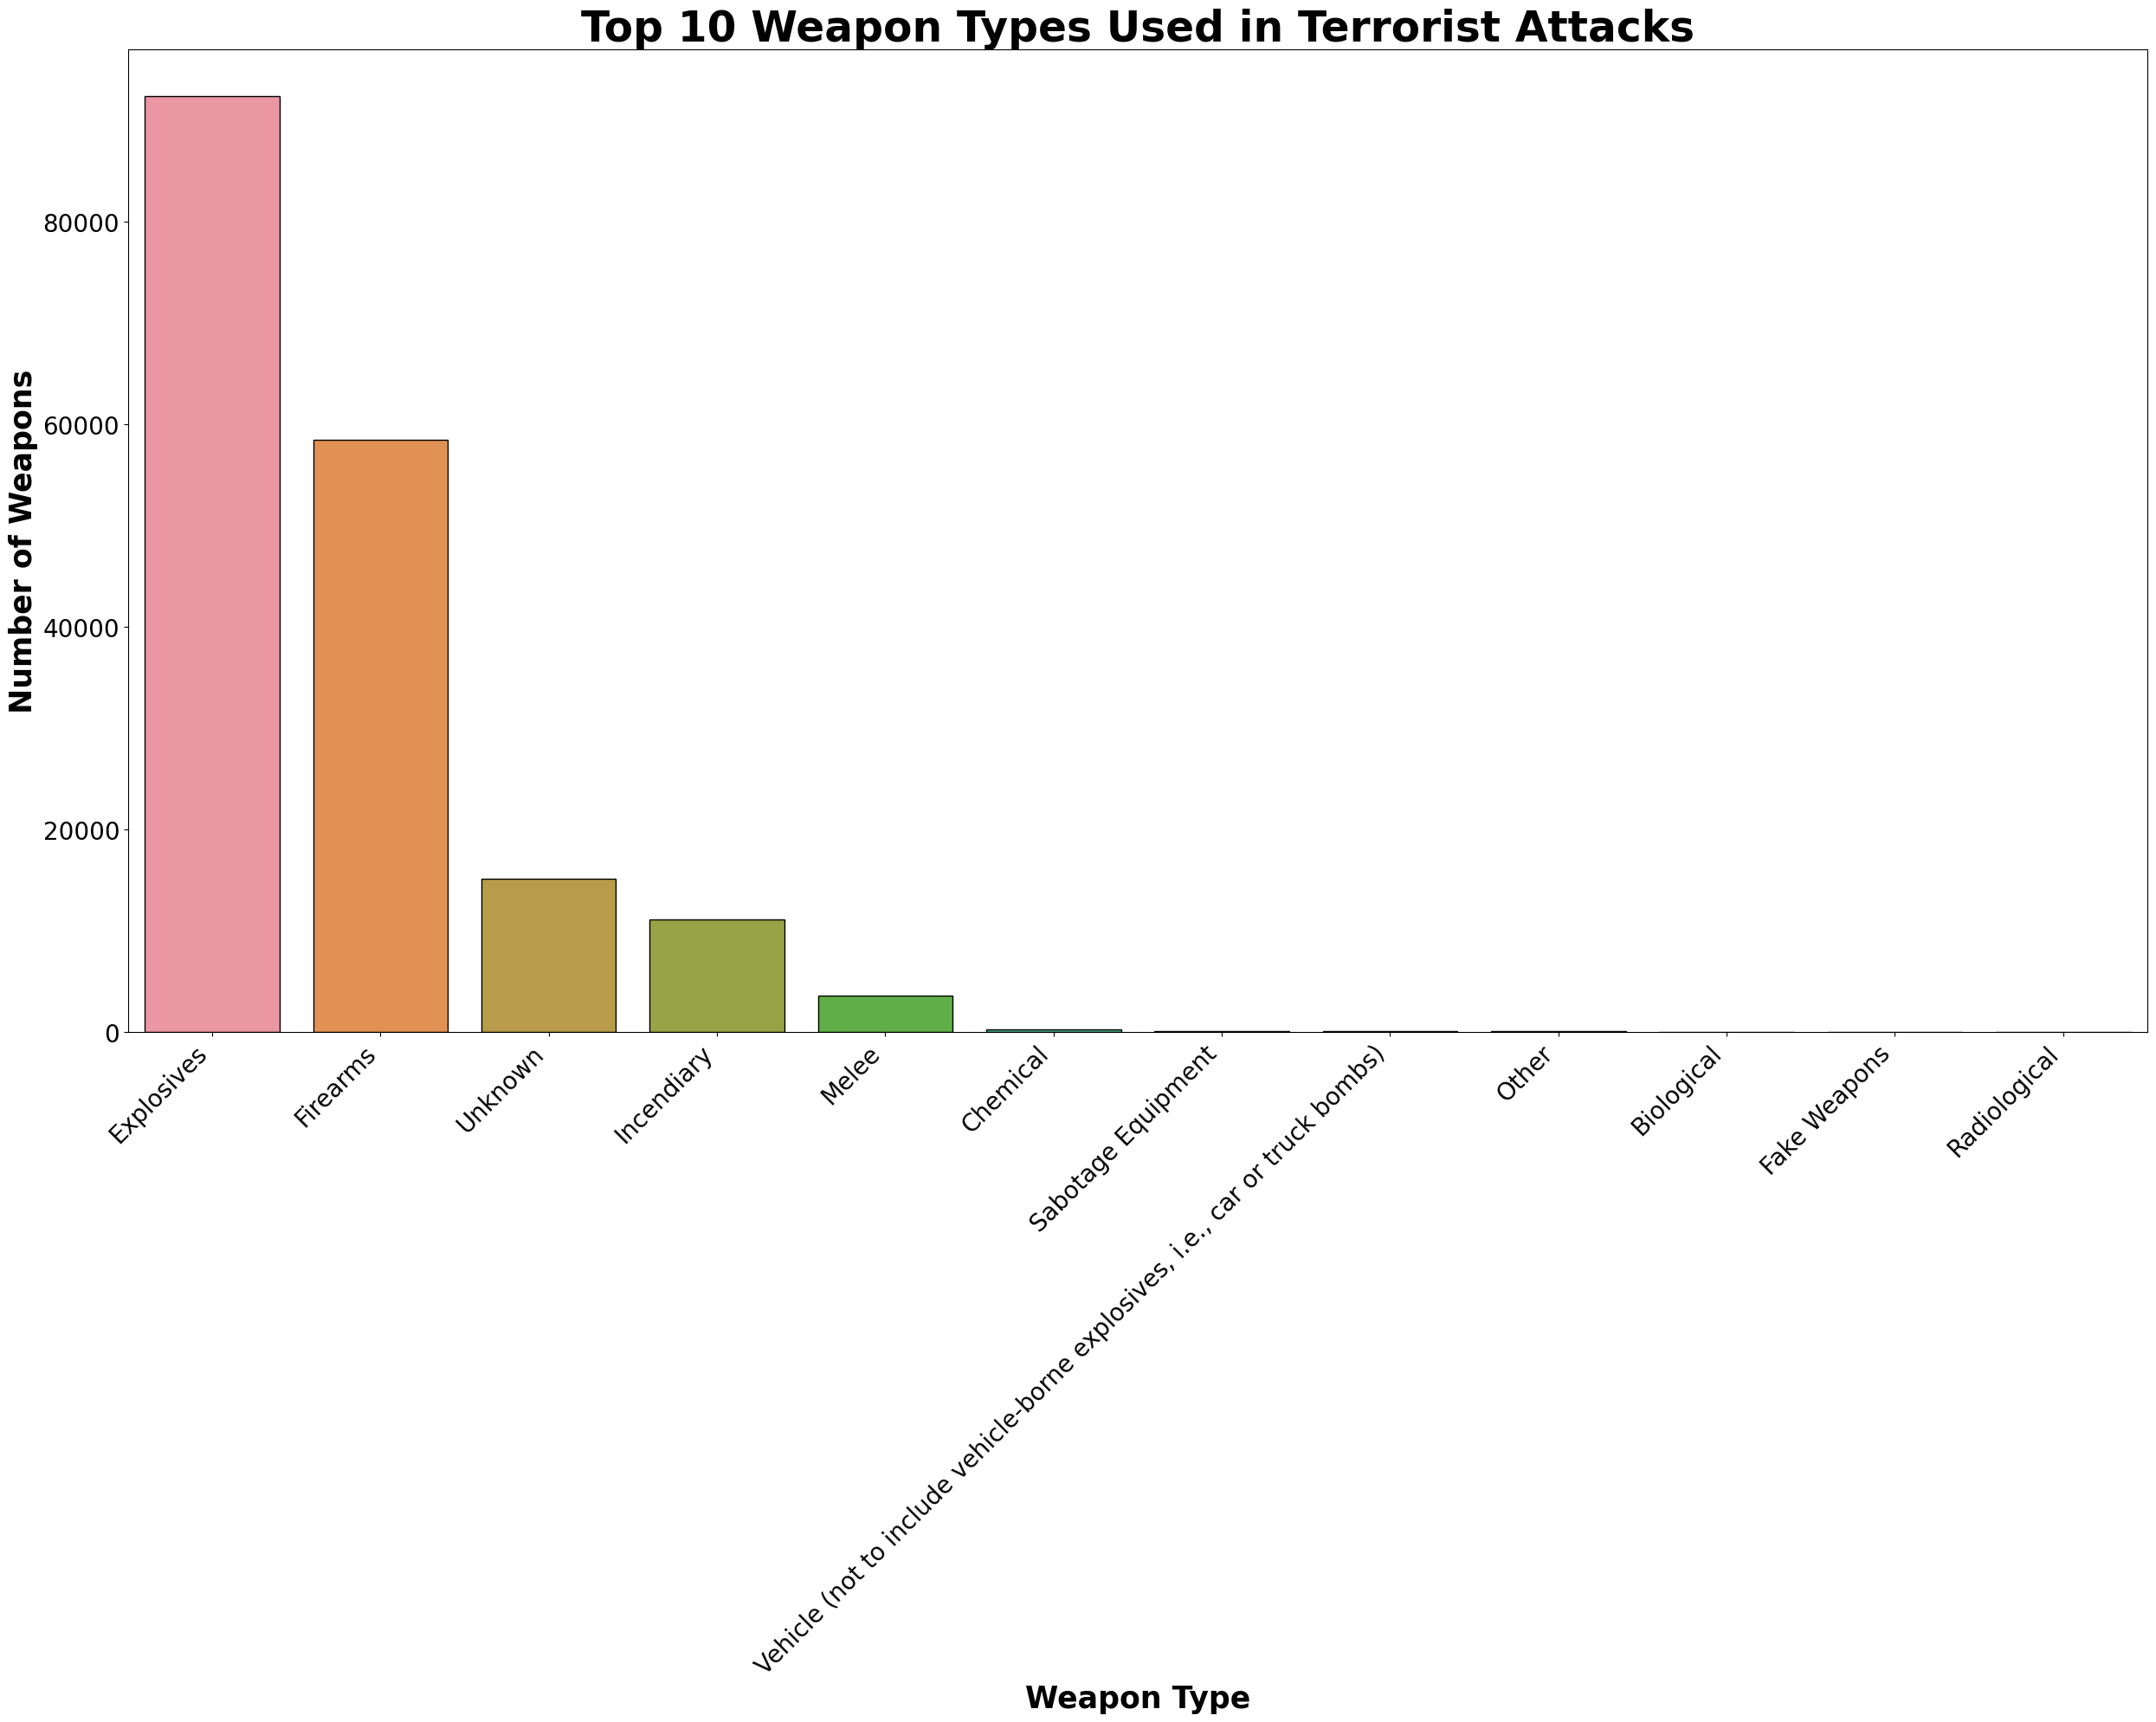

In [23]:
plt.figure(figsize=(25,20))
sns.countplot(data=data_terr, x='Weapon_type', order=data_terr['Weapon_type'].value_counts().index, edgecolor='k')
plt.xlabel('Weapon Type', fontweight='bold', fontsize=25)
plt.ylabel('Number of Weapons', fontweight='bold', fontsize=25)
plt.xticks(fontsize=20, rotation=45,ha='right')
plt.yticks(fontsize=20)
plt.title('Top 10 Weapon Types Used in Terrorist Attacks', fontweight='bold', fontsize=35)
plt.tight_layout()
plt.show()

In [24]:
data_terr['Weapon_type'].value_counts()[:10]

Explosives                                                                     92426
Firearms                                                                       58524
Unknown                                                                        15157
Incendiary                                                                     11135
Melee                                                                           3655
Chemical                                                                         321
Sabotage Equipment                                                               141
Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)      136
Other                                                                            114
Biological                                                                        35
Name: Weapon_type, dtype: int64

### The most used weapon is Explosives

## 8. Type of Attacks

Text(0.5, 1.0, 'Type of Attacks')

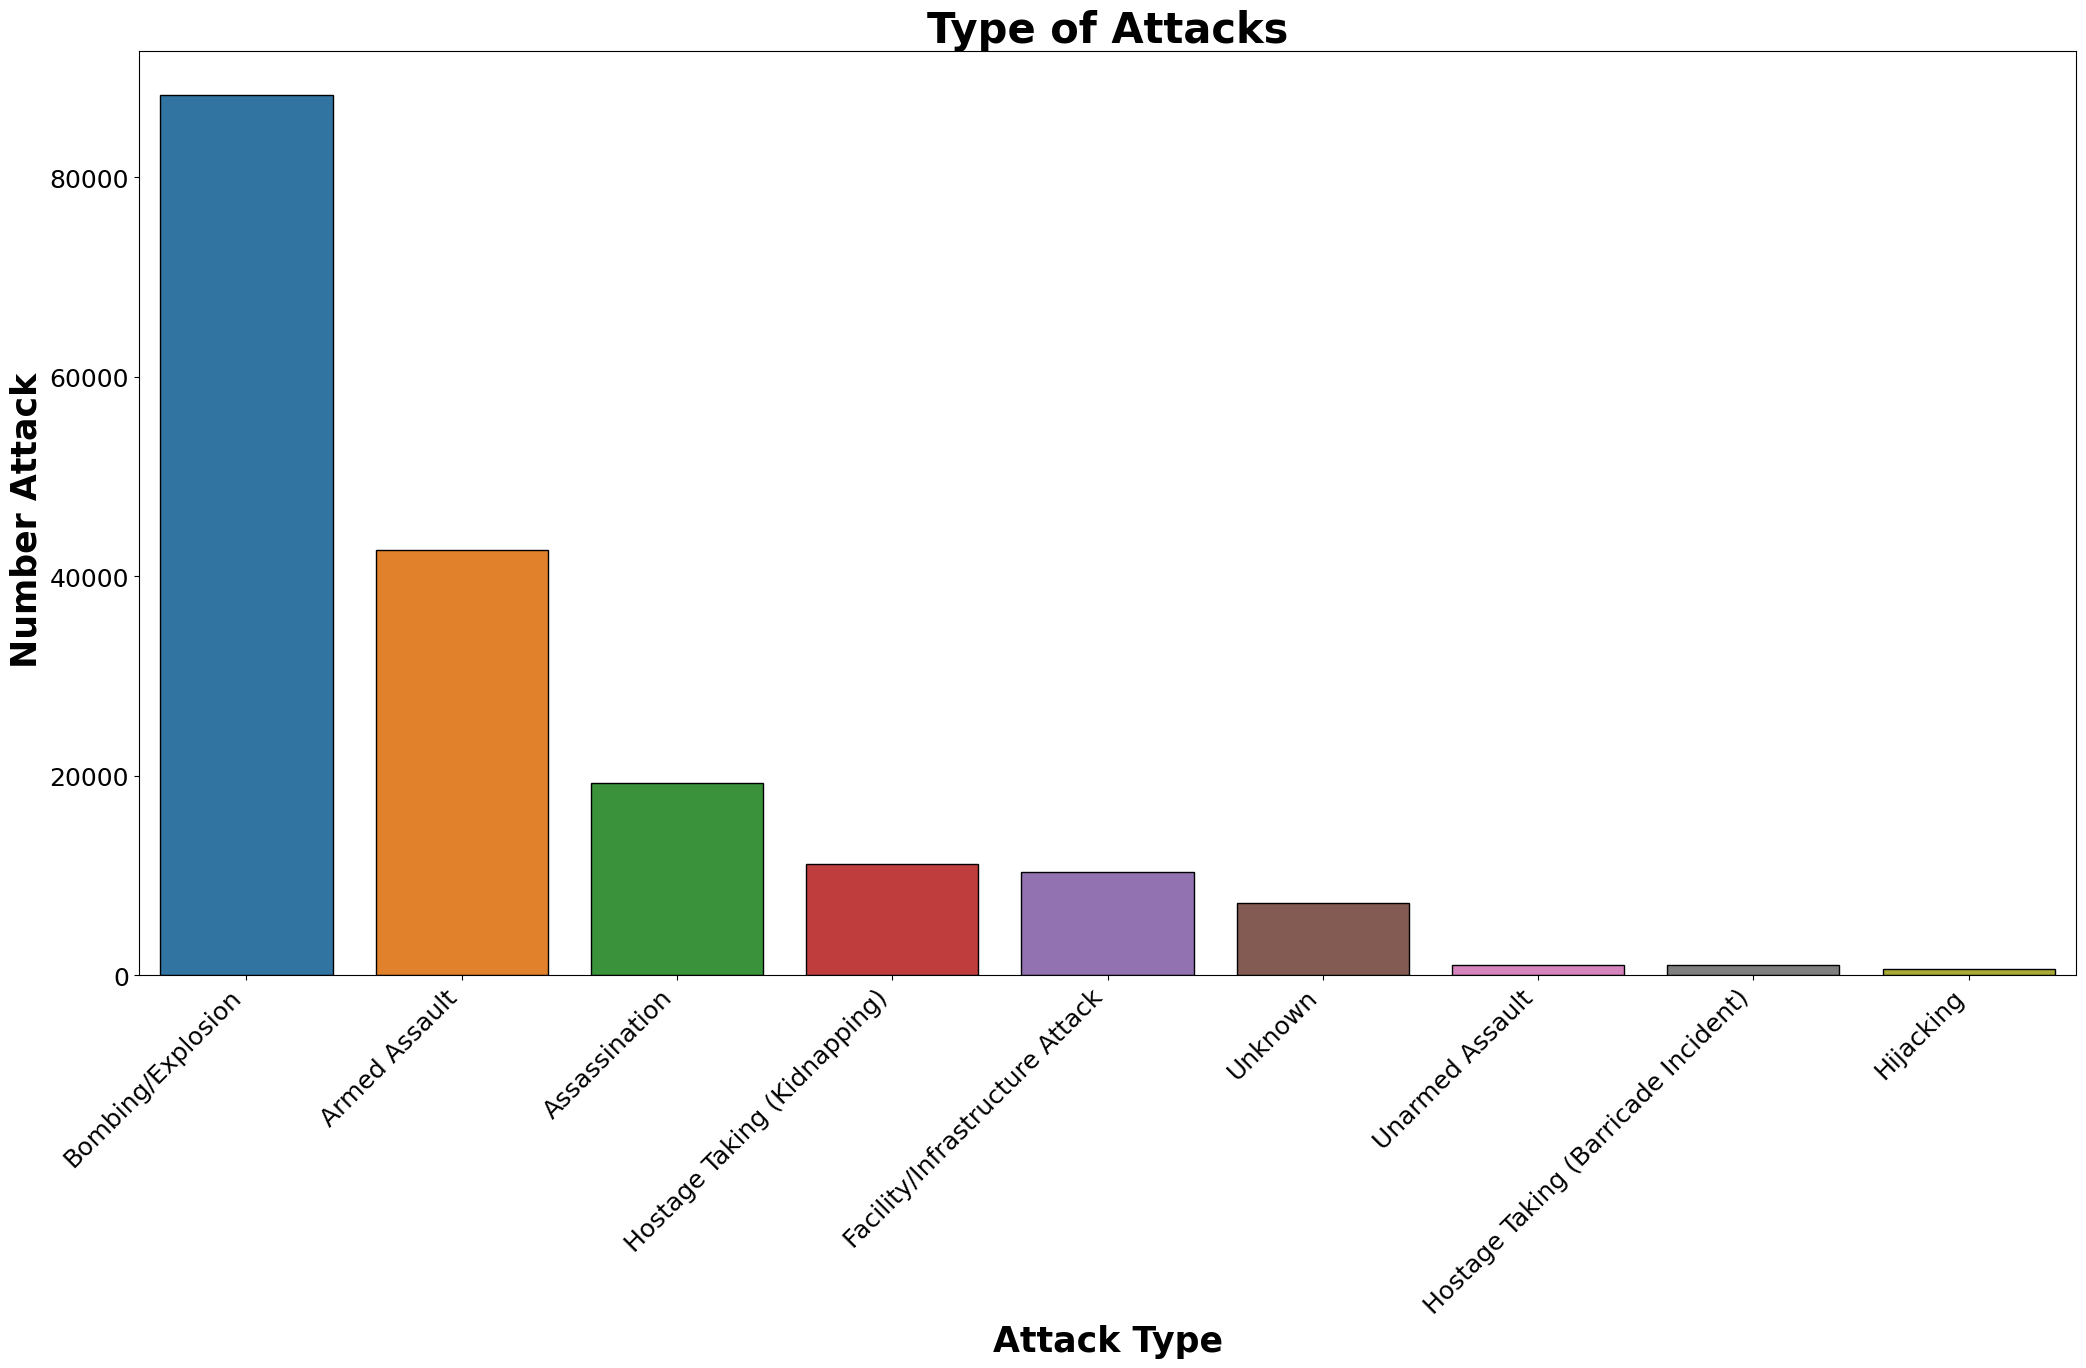

In [25]:
plt.figure(figsize=(25,12))
sns.countplot(data=data_terr, x='AttackType', order=data_terr['AttackType'].value_counts().index, edgecolor='k')
plt.xlabel('Attack Type',fontweight='bold',fontsize=25)
plt.ylabel('Number Attack ',fontweight='bold',fontsize=25)
plt.xticks(fontsize=18, rotation=45, ha='right')
plt.yticks(fontsize=18)
plt.title('Type of Attacks',fontweight='bold',fontsize=30)

### The most attack are done by Bombing and Explosion

## 9. Type of Targets

(array([    0., 10000., 20000., 30000., 40000., 50000.]),
 [Text(0, 0.0, '0'),
  Text(0, 10000.0, '10000'),
  Text(0, 20000.0, '20000'),
  Text(0, 30000.0, '30000'),
  Text(0, 40000.0, '40000'),
  Text(0, 50000.0, '50000')])

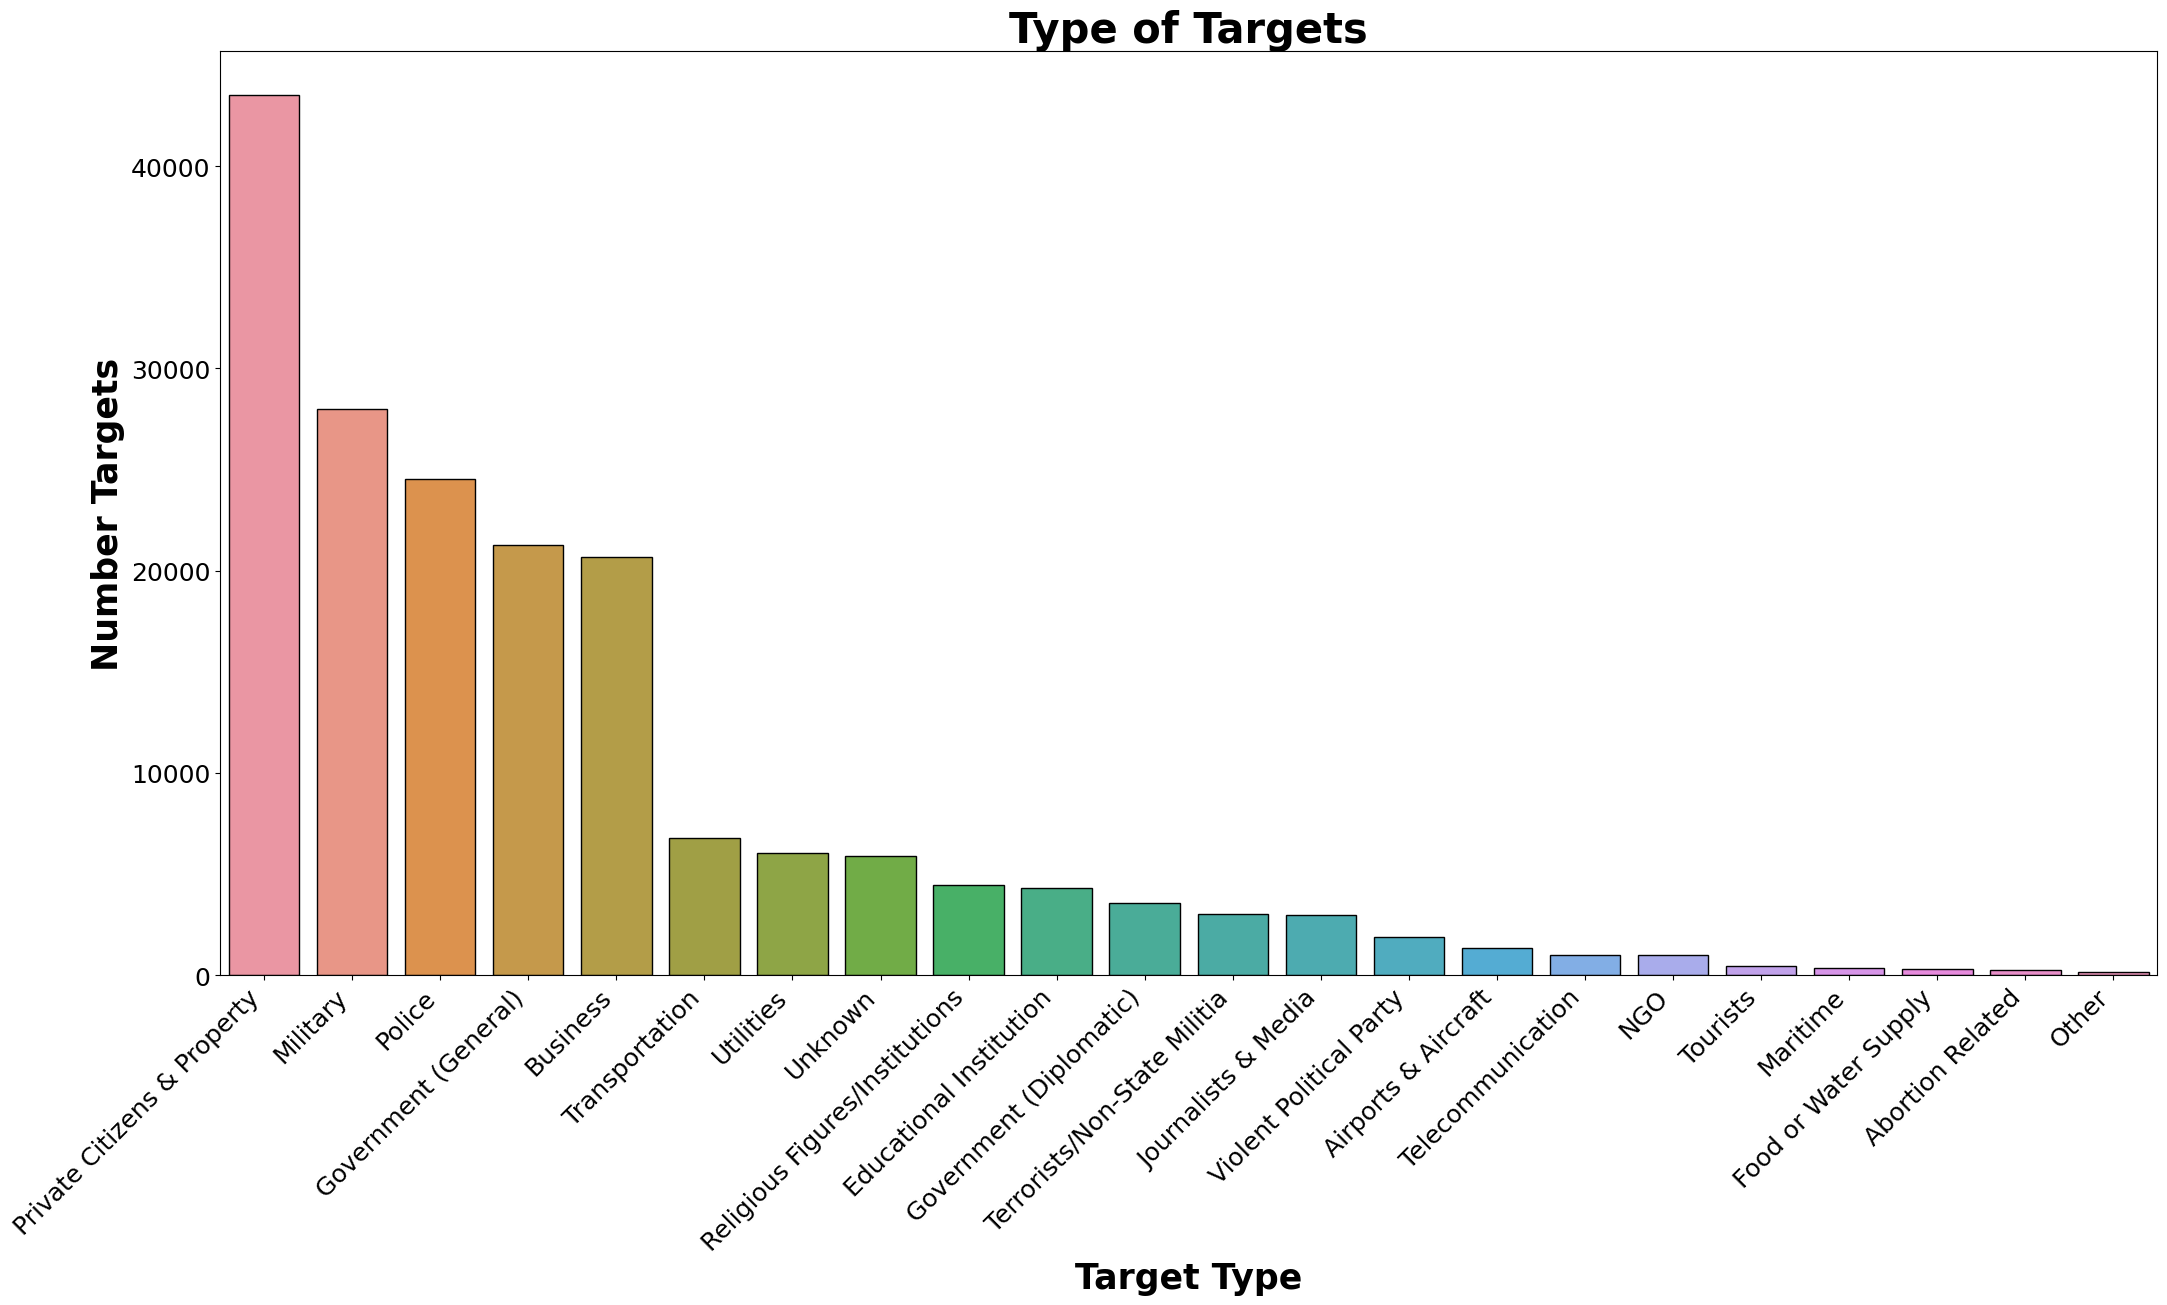

In [26]:
plt.figure(figsize=(25,12))
sns.countplot(data=data_terr, x='Target_type', order=data_terr['Target_type'].value_counts().index, edgecolor='k')
plt.xlabel('Target Type',fontweight='bold',fontsize=25)
plt.ylabel('Number Targets',fontweight='bold',fontsize=25)
plt.title('Type of Targets',fontweight='bold',fontsize=30)
plt.xticks(fontsize=18, rotation=45, ha='right')
plt.yticks(fontsize=18)

### The main attack target was Private citizens and property

## 10. People Killed in each type of Attack

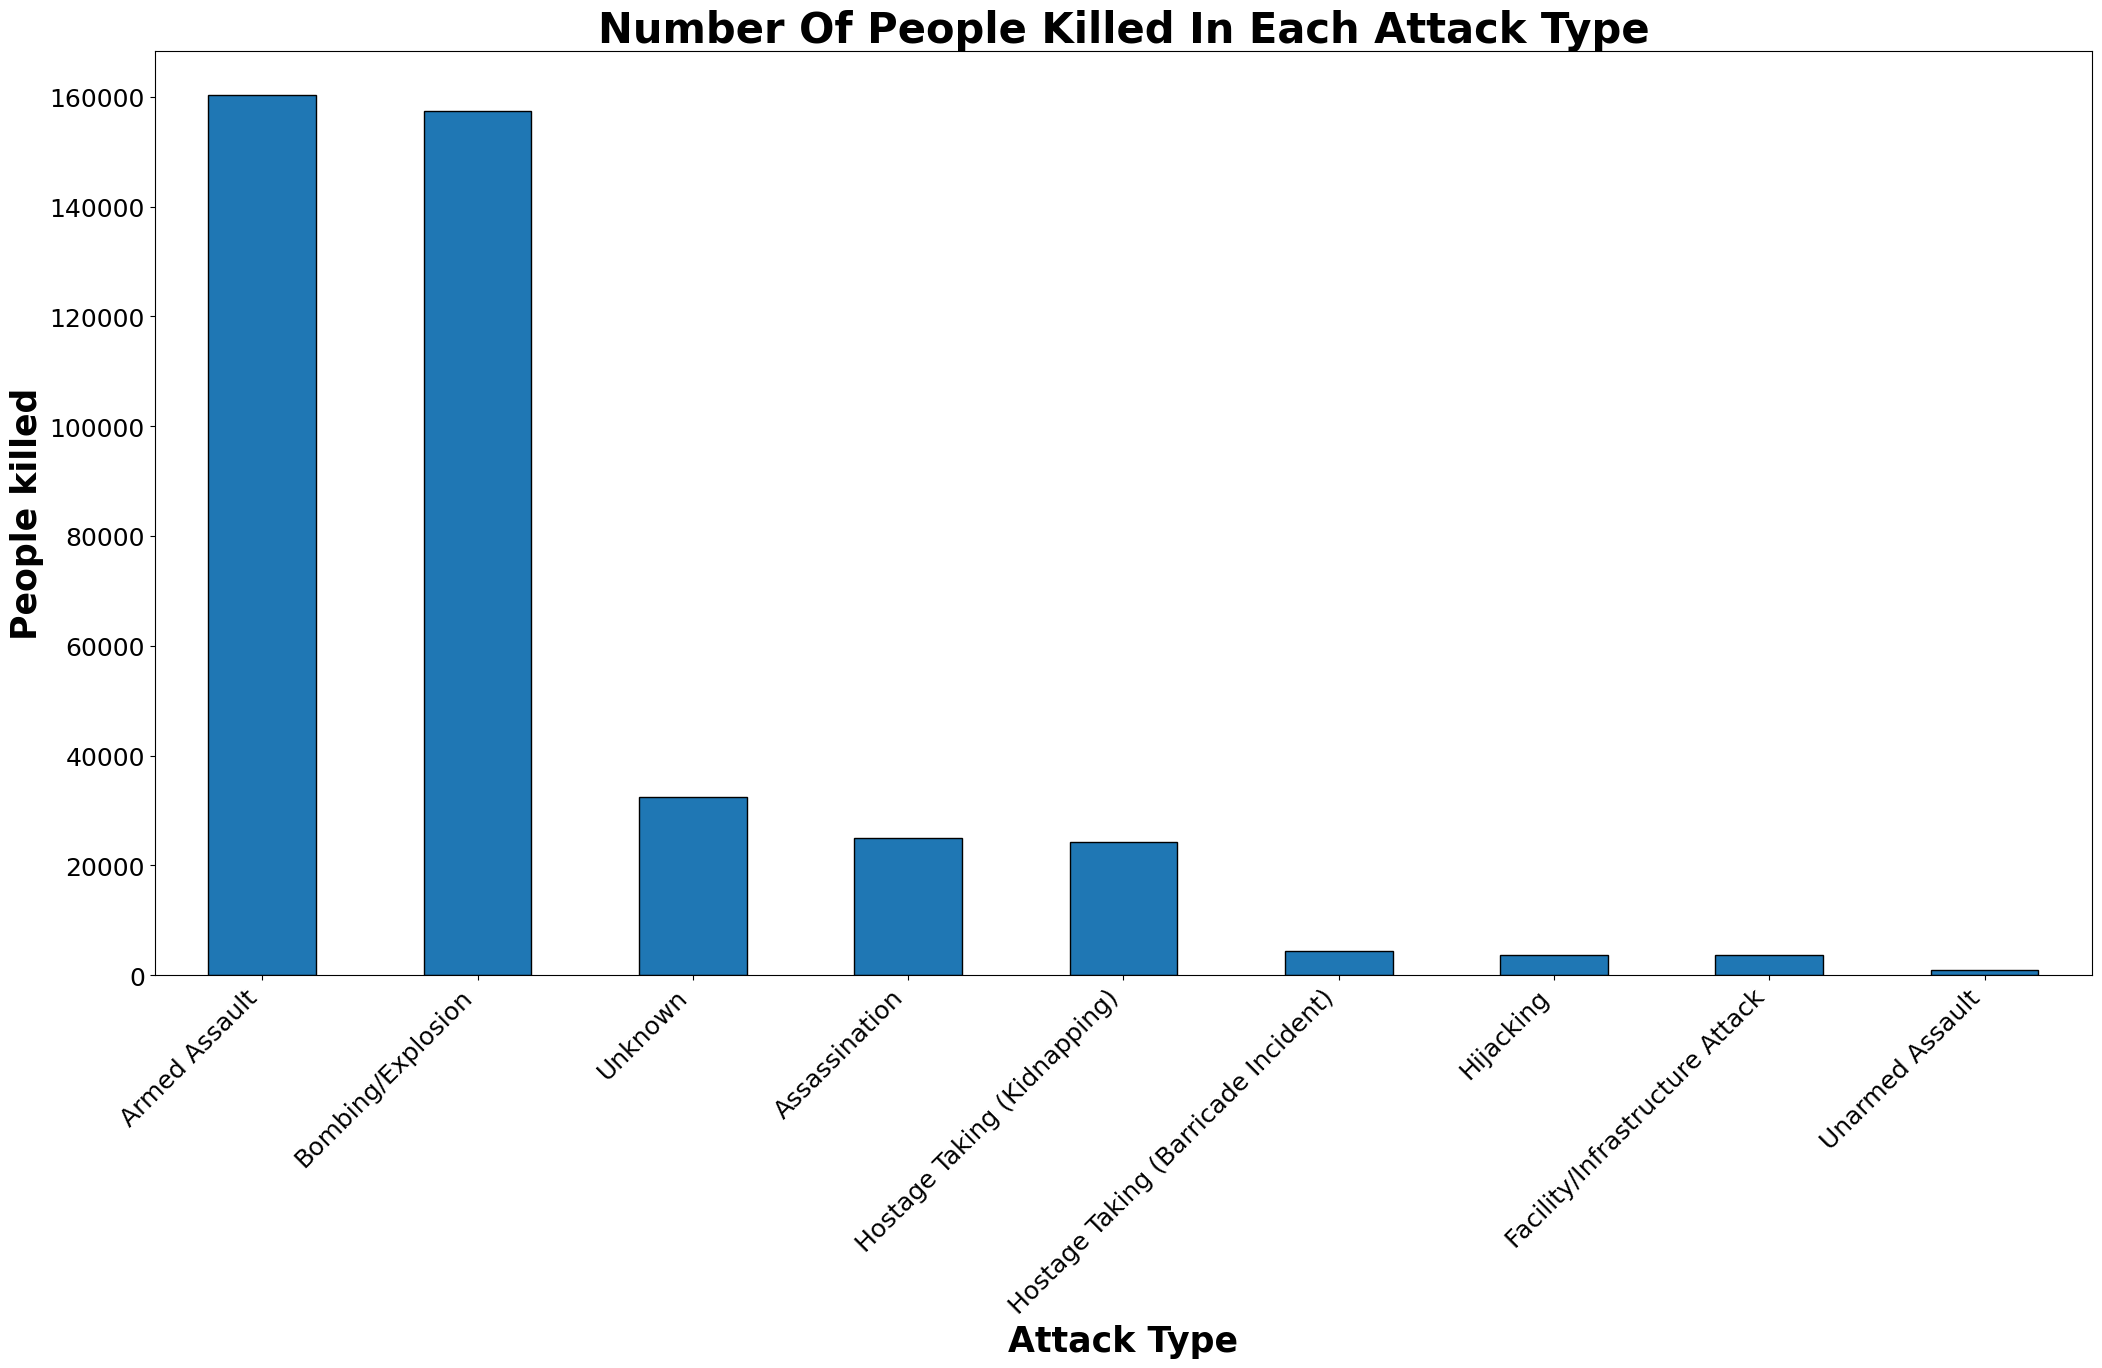

In [27]:
#Bar Plot
plt.subplots(figsize=(25,12))
data_terr.groupby(['AttackType'])['Killed'].sum().sort_values(ascending = False).head(20).plot(kind = 'bar', edgecolor='k')
plt.title("Number Of People Killed In Each Attack Type", fontweight='bold', fontsize=30)
plt.xlabel('Attack Type', fontweight='bold', fontsize=25)
plt.ylabel('People killed', fontweight='bold', fontsize=25)
plt.xticks(fontsize=18, rotation=45, ha='right')
plt.yticks(fontsize=18)
plt.show()

### The most number of people killed in Armed Assault

## Conclusion :

### 1. In 2014 we saw the most number of terrorist attacks (Total=16903), closely followed by 2015 (Total=14965) and 2016 (13587).

### 2. Iraq is the most attacked country in the world.

### 3. Baghdad is the most insecure city in the world, witnessing 7589 attacks. 21151 people have been killed in Baghdad, and 78589 people in Iraq.

### 4. Explosives and firearms are mostly used weapons in attacks.

### 5. Till 2017, 24113 Iraqi nationals have been killed in terrorist attacks.

### 6. Taliban was involved in most of the terrorist attacks.

## Thank You